In [1]:
import sys 
import nibabel as nib 
import matplotlib.pyplot as plt 
import numpy as np 
import regtricks as rt 
from scipy import stats 
from scipy.ndimage import binary_erosion
import os.path as op 

In [31]:
root = '/Users/thomaskirk/Data/pcasl2/derivatives/fitted/sub-2/sub-2_sess-A_run-1_space-native_pvec-fast'
mask = nib.load(op.join(root, 'input/mask.nii.gz')).get_fdata().astype(bool)
pvgm = nib.load(op.join(root, 'input/pvgm.nii.gz')).get_fdata()
modelfit = nib.load(op.join(root, 'basil_pvcorr/main/step4/modelfit.nii.gz')).get_fdata()
data = nib.load(op.join(root, 'basil_pvcorr/main/asldata_diff.nii.gz')).get_fdata()
data[~mask,:] = 0 
size = pvgm.shape
spc = rt.ImageSpace(op.join(root, 'input/mask.nii.gz'))

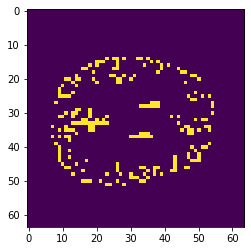

In [32]:
gmmask = (pvgm > 0.75) & (data.mean(-1) > 0)
plt.imshow(gmmask[...,size[-1]//2])

In [33]:
x = np.arange(48)
for pld in range(6): 
    start = pld * 8
    print(x[start:start+8])
    # print(x[pld::6])

[0 1 2 3 4 5 6 7]
[ 8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23]
[24 25 26 27 28 29 30 31]
[32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47]


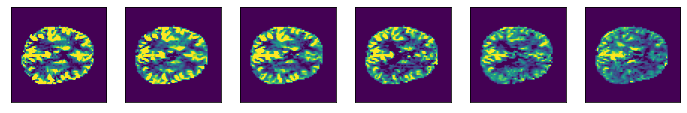

In [34]:
fig, axes = plt.subplots(1,6, figsize=(12,2))
for pld, ax in enumerate(axes): 
    start = pld * 8
    ax.imshow(data[:,:,12,start:start+8].mean(-1), vmin=0, vmax=20)
    # ax.imshow(data[:,:,12,pld::6].mean(-1), vmin=0, vmax=20)
    ax.set_xticks([])
    ax.set_yticks([])

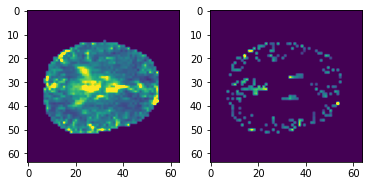

In [35]:
fig, axes = plt.subplots(1,2)
residual = modelfit - data 
noise_std = residual.std(-1)
axes[0].imshow(noise_std[...,size[-1]//2], vmax=20)
n2 = noise_std * np.ones_like(noise_std)
n2[~gmmask] = 0 
axes[1].imshow(n2[...,size[-1]//2], vmax=20)

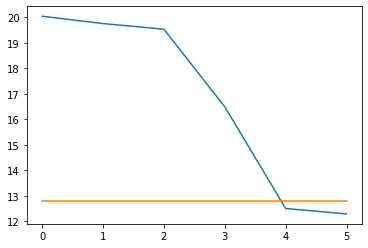

In [36]:
means = []

for pld in range(6): 
    data_pld = data[gmmask,pld*8:(pld+1)*8]
    means.append(data_pld.mean(-1).mean())

plt.plot(means)
plt.plot([0,5], 2*[noise_std[gmmask].mean()])

1.7235424660608964

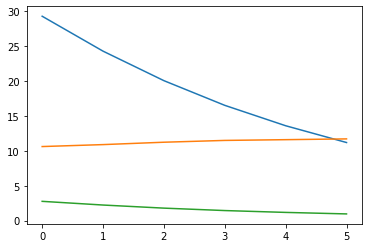

In [29]:
preds, noises = np.zeros(6), np.zeros(6)

for pld in range(6): 
    model_pld = modelfit[gmmask,pld*8:(pld+1)*8]
    residual_pld = residual[gmmask,pld*8:(pld+1)*8]
    sig = model_pld.mean(-1)
    noise_pld = residual_pld.std(-1)
    preds[pld] = sig.mean()
    noises[pld] = noise_pld.mean() 

plt.plot(preds)
plt.plot(noises)
plt.plot(preds/noises)
(preds/noises).mean()

In [30]:
# at 4mm iso: 
(preds/noises).mean() * (((4 ** 3) / spc.vox_size.prod()) ** 0.5)

1.8028793173124962